In [12]:
import pandas as pd
import os

# Merging the 12 months of Sales Data into One single Yearly Data CSV file

In [14]:
# df1=pd.read_csv("C:/Users/Kislay Karan/Downloads/New folder/New folder/Dedicated_CSV_Files/5_Sales_Data/Sales_April_2019.csv")


 # returns everything inside a directory -- including both files and directories.
    
files=[file for file in os.listdir('C:/Users/Kislay Karan/Downloads/New folder/New folder/Dedicated_CSV_Files/5_Sales_Data')]

for file in files:
    print(file)



Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [19]:
files=[file for file in os.listdir('C:/Users/Kislay Karan/Downloads/New folder/New folder/Dedicated_CSV_Files/5_Sales_Data')]

yearly_data=pd.DataFrame()

for file in files:
    df=pd.read_csv( "C:/Users/Kislay Karan/Downloads/New folder/New folder/Dedicated_CSV_Files/5_Sales_Data/"+file)
    yearly_data=pd.concat([yearly_data,df])
    
yearly_data.to_csv("yearly_data.csv", index=False)     


In [20]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning up the Data

In [21]:
# cannot convert float NaN to integer


nan_df=yearly_data[yearly_data.isna().any(axis=1)]
nan_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
yearly_data=yearly_data.dropna(how='all')   # Will display rows having all the values as NaN

In [23]:
#invalid literal for int() with base 10: 'Or'

#Finding 'Or' and deleting it

temp_df=yearly_data[yearly_data['Order Date'].str[0:2]== 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [24]:
yearly_data=yearly_data[yearly_data['Order Date'].str[0:2]!= 'Or']    # Removing/ Dropping the NaN rows based on condition
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [25]:
# can't multiply sequence by non-int of type 'str'

# Converting the columns to their correct data types 

yearly_data['Quantity Ordered']= pd.to_numeric(yearly_data['Quantity Ordered'])   # Making int
yearly_data['Price Each']= pd.to_numeric(yearly_data['Price Each'])               # Making float

yearly_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [26]:
yearly_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Augment Data with Additional columns

# Adding the month column

In [27]:
yearly_data['Month']=yearly_data['Order Date'].str[0:2]   #  adding the month Column
yearly_data['Month']=yearly_data['Month'].astype('int32')  # Converting the added month column to int data type
yearly_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Adding a Sales Column

In [28]:
yearly_data['Sales']= yearly_data['Quantity Ordered']* yearly_data['Price Each']
yearly_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
yearly_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')

In [30]:
# Rearrranging the columns 



yearly_data=yearly_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date',
       'Purchase Address', 'Month']]
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Adding a 'City' Column along with the State Code 

In [31]:
# using the  .apply() method helps us to use/run any arbitary function with the Dataframe

# define a function and  taking in some values

def get_city(address):
    return address.split(',')[1]


def get_state(address):
    return address.split(',')[2].split(' ')[1]

yearly_data['City']=yearly_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
yearly_data.head()


# Using the f"{ } " F-String

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [32]:
# OR by directly using the arbitary function    

yearly_data['City']=yearly_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# for each of the cell content(x) split by ',' and grab the 1st index..... i.e from the 1st ','

# Best Month for the Sale ......

In [33]:
results= yearly_data.groupby('Month').sum()

results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


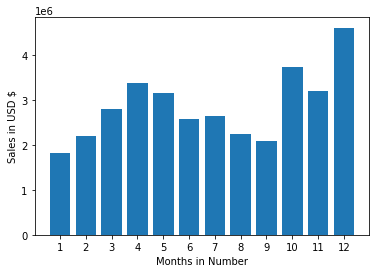

In [34]:
import matplotlib.pyplot as plt

months=range(1,13)      # 13 is exclusive will actually get us 1 to 12

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Months in Number')
plt.show()

# Which City had the Highest no of Sales

In [35]:
Total_Sales =yearly_data.groupby(['City'], as_index= False)['Sales'].sum()

Total_Sales

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


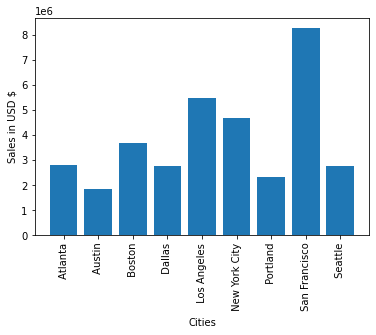

In [36]:
cities=[city for city, df in yearly_data.groupby('City')]

plt.bar(cities, Total_Sales['Sales'])
plt.xticks(cities, rotation= 90, size=10)
plt.ylabel('Sales in USD $')
plt.xlabel('Cities')
plt.show()


# What Time should we display advertisments to increase the likelihood of the customers buying the products

In [37]:
yearly_data['Order Date']= pd.to_datetime(yearly_data['Order Date'])

In [38]:
yearly_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Sales                      float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
City                        object
dtype: object

In [39]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [40]:
yearly_data['Hour']=yearly_data['Order Date'].dt.hour
yearly_data['Minute']=yearly_data['Order Date'].dt.minute
 
yearly_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,20,56
11682,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,16,0
11683,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,7,39
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,17,30


In [41]:

yearly_data=yearly_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month', 'Hour','Minute',
       'Purchase Address', 'City']]
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Hour,Minute,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,8,46,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,22,30,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,9,27,"333 8th St, Los Angeles, CA 90001",Los Angeles


In [42]:
#yearly_data.groupby(['Hour']).count
yearly_data.groupby(['Hour'], as_index= False)['Quantity Ordered'].count()

,Hour,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


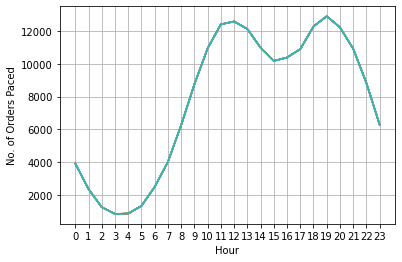

In [43]:
hours=[hour for hour, df in yearly_data.groupby('Hour')]

plt.plot(hours, yearly_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders Paced')
plt.grid()
plt.show()

# b/w 11 am to 1 pm    and   b/w 5 pm to 7 pm

# What Products are most often sold together

In [44]:
# Same 'Order ID' ( duplicates) then the products are sold together and even having the same 'Purchase Address' and 'Order Date'
# and then we can figure out what products are mostly sold together.

df=yearly_data[yearly_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Hour,Minute,Purchase Address,City
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,4,19,42,"20 Hill St, Los Angeles, CA 90001",Los Angeles
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,4,19,42,"20 Hill St, Los Angeles, CA 90001",Los Angeles
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,11,31,"823 Highland St, Boston, MA 02215",Boston
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,11,31,"823 Highland St, Boston, MA 02215",Boston
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,4,17,0,"365 Center St, San Francisco, CA 94016",San Francisco
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,4,17,0,"365 Center St, San Francisco, CA 94016",San Francisco
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,4,11,7,"778 Maple St, New York City, NY 10001",New York City
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,4,11,7,"778 Maple St, New York City, NY 10001",New York City


In [45]:
# Creating a new column name as 'Grouped' column . then we try to get them (merge) in one single row
# and then count the no of ocurences of the Values in the 'Grouped' column 

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))  
df


# Editing the cell contents and joing the 'Products' in two different rows having the same 'Order ID' into one same row.

C:\Users\KISLAY~1\AppData\Local\Temp/ipykernel_6112/486068476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Hour,Minute,Purchase Address,City,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,4,19,42,"20 Hill St, Los Angeles, CA 90001",Los Angeles,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,4,19,42,"20 Hill St, Los Angeles, CA 90001",Los Angeles,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,11,31,"823 Highland St, Boston, MA 02215",Boston,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,9,20,18,"106 7th St, Atlanta, GA 30301",Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,9,0,25,"241 Highland St, Atlanta, GA 30301",Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,9,0,25,"241 Highland St, Atlanta, GA 30301",Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,9,13,49,"519 Maple St, San Francisco, CA 94016",San Francisco,"Google Phone,USB-C Charging Cable"


In [46]:
# Drping th duplicate occurences of the 'Order ID'  and fetch only the 'Order ID ' and 'Grouped' columns only as the Result

df=df[['Order ID', 'Grouped']].drop_duplicates()

df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [47]:
#  Now will count the no of values occurences of the each 'Grouped' pairs and the most frequent occurences out of it.

In [48]:
from itertools import combinations

from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [49]:
# for 3 Products ordered Together

from itertools import combinations

from collections import Counter

counts=Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    counts.update(Counter(combinations(row_list,3)))

for key,value in counts.most_common(10):
    print(key, value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


# What product got sold the most....and why was it sold the most

In [50]:
#group by 'Product'  and then Sum up the 'Quantity Ordered' of the product 

prod_quant_ord=yearly_data.groupby(['Product'], as_index= False)['Quantity Ordered'].sum()

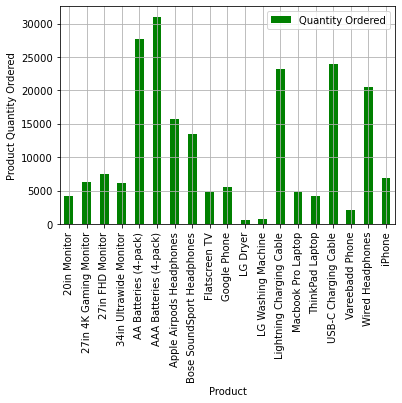

In [51]:
prod_quant_ord.plot(x="Product", y=[ "Quantity Ordered"], kind="bar", color='green')
plt.ylabel('Product Quantity Ordered')
plt.grid()
